In [76]:
import yfinance as yf
import pandas as pd
from pandas_datareader import data as pdr
import datetime as dt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [77]:
import requests
import uuid

In [78]:
msft = yf.Ticker("MSFT")

msft.info

{'address1': 'One Microsoft Way',
 'city': 'Redmond',
 'state': 'WA',
 'zip': '98052-6399',
 'country': 'United States',
 'phone': '425 882 8080',
 'website': 'https://www.microsoft.com',
 'industry': 'Software—Infrastructure',
 'industryDisp': 'Software—Infrastructure',
 'sector': 'Technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Microsoft Corporation develops and supports software, services, devices and solutions worldwide. The Productivity and Business Processes segment offers office, exchange, SharePoint, Microsoft Teams, office 365 Security and Compliance, Microsoft viva, and Microsoft 365 copilot; and office consumer services, such as Microsoft 365 consumer subscriptions, Office licensed on-premises, and other office services. This segment also provides LinkedIn; and dynamics business solutions, including Dynamics 365, a set of intelligent, cloud-based applications across ERP, CRM, power apps, and power automate; and on-premises ERP and CRM applications. The Int

In [79]:
hist = msft.history(period="max")

hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13 00:00:00-05:00,0.055004,0.063093,0.055004,0.060396,1031788800,0.0,0.0
1986-03-14 00:00:00-05:00,0.060396,0.063632,0.060396,0.062553,308160000,0.0,0.0
1986-03-17 00:00:00-05:00,0.062553,0.064172,0.062553,0.063632,133171200,0.0,0.0
1986-03-18 00:00:00-05:00,0.063632,0.064172,0.061475,0.062014,67766400,0.0,0.0
1986-03-19 00:00:00-05:00,0.062014,0.062553,0.060396,0.060936,47894400,0.0,0.0
...,...,...,...,...,...,...,...
2023-09-05 00:00:00-04:00,329.000000,334.850006,328.660004,333.549988,18553900,0.0,0.0
2023-09-06 00:00:00-04:00,333.380005,334.459991,330.179993,332.880005,17535800,0.0,0.0
2023-09-07 00:00:00-04:00,331.290009,333.079987,329.029999,329.910004,18381000,0.0,0.0


In [80]:
msft.actions # dividends, splits

,Dividends,Stock Splits
Date,,
1987-09-21 00:00:00-04:00,0.00,2.0
1990-04-16 00:00:00-04:00,0.00,2.0
1991-06-27 00:00:00-04:00,0.00,1.5
1992-06-15 00:00:00-04:00,0.00,1.5
1994-05-23 00:00:00-04:00,0.00,2.0
...,...,...
2022-08-17 00:00:00-04:00,0.62,0.0
2022-11-16 00:00:00-05:00,0.68,0.0
2023-02-15 00:00:00-05:00,0.68,0.0


In [81]:
msft.dividends

Date
2003-02-19 00:00:00-05:00    0.08
2003-10-15 00:00:00-04:00    0.16
2004-08-23 00:00:00-04:00    0.08
2004-11-15 00:00:00-05:00    3.08
2005-02-15 00:00:00-05:00    0.08
                             ... 
2022-08-17 00:00:00-04:00    0.62
2022-11-16 00:00:00-05:00    0.68
2023-02-15 00:00:00-05:00    0.68
2023-05-17 00:00:00-04:00    0.68
2023-08-16 00:00:00-04:00    0.68
Name: Dividends, Length: 79, dtype: float64

In [82]:
msft.splits

Date
1987-09-21 00:00:00-04:00    2.0
1990-04-16 00:00:00-04:00    2.0
1991-06-27 00:00:00-04:00    1.5
1992-06-15 00:00:00-04:00    1.5
1994-05-23 00:00:00-04:00    2.0
1996-12-09 00:00:00-05:00    2.0
1998-02-23 00:00:00-05:00    2.0
1999-03-29 00:00:00-05:00    2.0
2003-02-18 00:00:00-05:00    2.0
Name: Stock Splits, dtype: float64

In [83]:
msft.major_holders

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/yfinance/scrapers/holders.py:39: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  holders = pd.read_html(resp.text)


,0,1
0,0.05%,% of Shares Held by All Insider
1,73.21%,% of Shares Held by Institutions
2,73.25%,% of Float Held by Institutions
3,6255,Number of Institutions Holding Shares


In [84]:
msft.institutional_holders

,Holder,Shares,Date Reported,% Out,Value
0,Vanguard Group Inc,653247546,2023-06-29,0.0879,220758477290
1,Blackrock Inc.,536245027,2023-06-29,0.0722,181218645733
2,State Street Corporation,293614078,2023-06-29,0.0395,99223942236
3,"FMR, LLC",210111250,2023-06-29,0.0283,71004996337
4,Price (T.Rowe) Associates Inc,159904219,2023-06-29,0.0215,54038032159
5,"Geode Capital Management, LLC",148129470,2023-06-29,0.0199,50058873453
6,Morgan Stanley,123498322,2023-06-29,0.0166,41735023238
7,JP Morgan Chase & Company,113024837,2023-06-29,0.0152,38195613691
8,Norges Bank Investment Management,86316926,2022-12-30,0.0116,29169942183
9,Capital World Investors,85507261,2023-06-29,0.0115,28896323991


In [85]:
msft.balance_sheet

,2023-06-30,2022-06-30,2021-06-30,2020-06-30
Ordinary Shares Number,7432000000.0,7464000000.0,7519000000.0,7571000000.0
Share Issued,7432000000.0,7464000000.0,7519000000.0,7571000000.0
Net Debt,12533000000.0,35850000000.0,43922000000.0,49751000000.0
Total Debt,59965000000.0,61270000000.0,67775000000.0,70998000000.0
Tangible Book Value,128971000000.0,87720000000.0,84477000000.0,67915000000.0
...,...,...,...,...
Cash Cash Equivalents And Short Term Investments,111262000000.0,104757000000.0,130334000000.0,136527000000.0
Other Short Term Investments,76558000000.0,90826000000.0,116110000000.0,122951000000.0
Cash And Cash Equivalents,34704000000.0,13931000000.0,14224000000.0,13576000000.0
Cash Equivalents,26226000000.0,5673000000.0,6952000000.0,NaN


In [86]:
msft.financials

,2023-06-30,2022-06-30,2021-06-30,2020-06-30
Tax Effect Of Unusual Items,0.0,0.0,0.0,0.0
Tax Rate For Calcs,0.189786,0.131134,0.138266,0.16
Normalized EBITDA,102384000000.0,97843000000.0,81602000000.0,65755000000.0
Total Unusual Items,-15000000.0,334000000.0,1303000000.0,28000000.0
Total Unusual Items Excluding Goodwill,-15000000.0,334000000.0,1303000000.0,28000000.0
Net Income From Continuing Operation Net Minority Interest,72361000000.0,72738000000.0,61271000000.0,44281000000.0
Reconciled Depreciation,13861000000.0,14460000000.0,11686000000.0,12796000000.0
Reconciled Cost Of Revenue,65863000000.0,62650000000.0,52232000000.0,46078000000.0
EBIT,88523000000.0,83383000000.0,69916000000.0,52959000000.0
Net Interest Income,1026000000.0,31000000.0,-215000000.0,89000000.0


In [87]:
msft.income_stmt

,2023-06-30,2022-06-30,2021-06-30,2020-06-30
Tax Effect Of Unusual Items,0.0,0.0,0.0,0.0
Tax Rate For Calcs,0.189786,0.131134,0.138266,0.16
Normalized EBITDA,102384000000.0,97843000000.0,81602000000.0,65755000000.0
Total Unusual Items,-15000000.0,334000000.0,1303000000.0,28000000.0
Total Unusual Items Excluding Goodwill,-15000000.0,334000000.0,1303000000.0,28000000.0
Net Income From Continuing Operation Net Minority Interest,72361000000.0,72738000000.0,61271000000.0,44281000000.0
Reconciled Depreciation,13861000000.0,14460000000.0,11686000000.0,12796000000.0
Reconciled Cost Of Revenue,65863000000.0,62650000000.0,52232000000.0,46078000000.0
EBIT,88523000000.0,83383000000.0,69916000000.0,52959000000.0
Net Interest Income,1026000000.0,31000000.0,-215000000.0,89000000.0


In [88]:
msft.cash_flow

,2023-06-30,2022-06-30,2021-06-30,2020-06-30
Free Cash Flow,59475000000.0,65149000000.0,56118000000.0,45234000000.0
Repurchase Of Capital Stock,-22245000000.0,-32696000000.0,-27385000000.0,-22968000000.0
Repayment Of Debt,-2750000000.0,-9023000000.0,-3750000000.0,-5518000000.0
Issuance Of Debt,NaN,NaN,NaN,0.0
Issuance Of Capital Stock,1866000000.0,1841000000.0,1693000000.0,1343000000.0
Capital Expenditure,-28107000000.0,-23886000000.0,-20622000000.0,-15441000000.0
End Cash Position,34704000000.0,13931000000.0,14224000000.0,13576000000.0
Beginning Cash Position,13931000000.0,14224000000.0,13576000000.0,11356000000.0
Effect Of Exchange Rate Changes,-194000000.0,-141000000.0,-29000000.0,-201000000.0
Changes In Cash,20967000000.0,-152000000.0,677000000.0,2421000000.0


In [89]:
msft.options

('2023-09-15',
 '2023-09-22',
 '2023-09-29',
 '2023-10-06',
 '2023-10-13',
 '2023-10-20',
 '2023-10-27',
 '2023-11-17',
 '2023-12-15',
 '2024-01-19',
 '2024-02-16',
 '2024-03-15',
 '2024-04-19',
 '2024-06-21',
 '2024-09-20',
 '2024-12-20',
 '2025-01-17',
 '2025-06-20',
 '2025-12-19')

<Axes: xlabel='Date'>

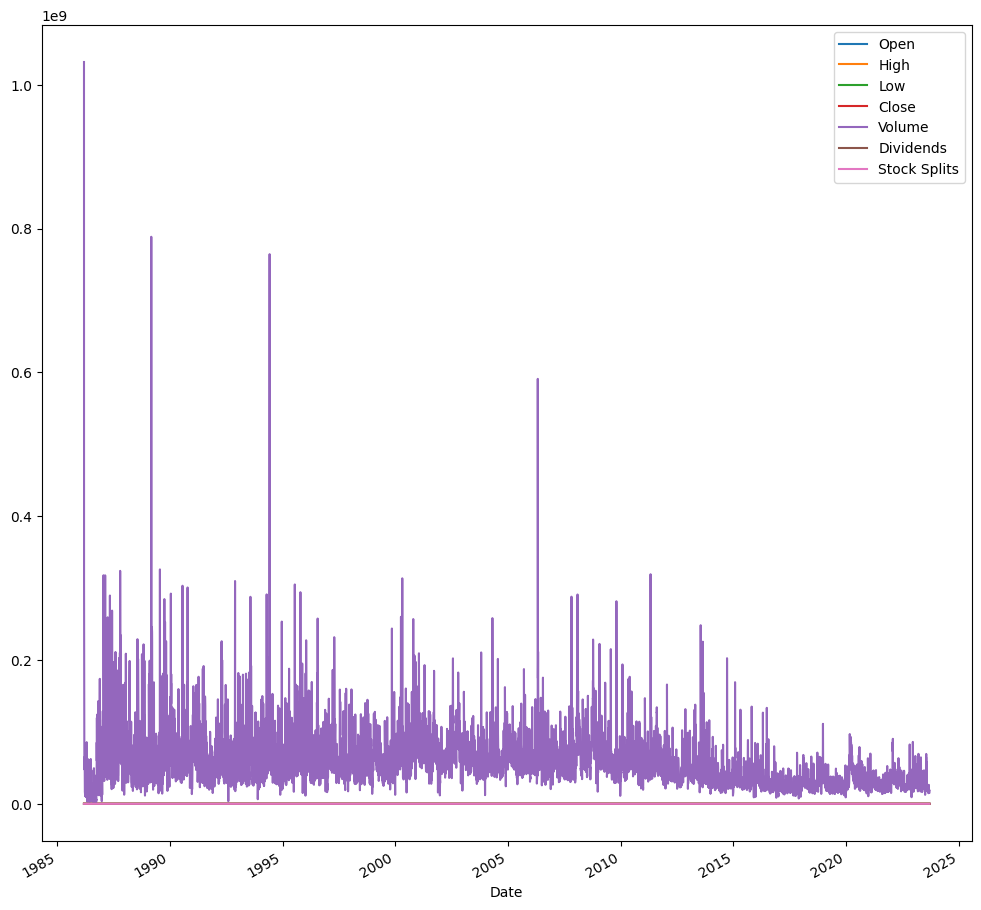

In [90]:
hist.plot(kind="line", figsize=(12, 12))

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

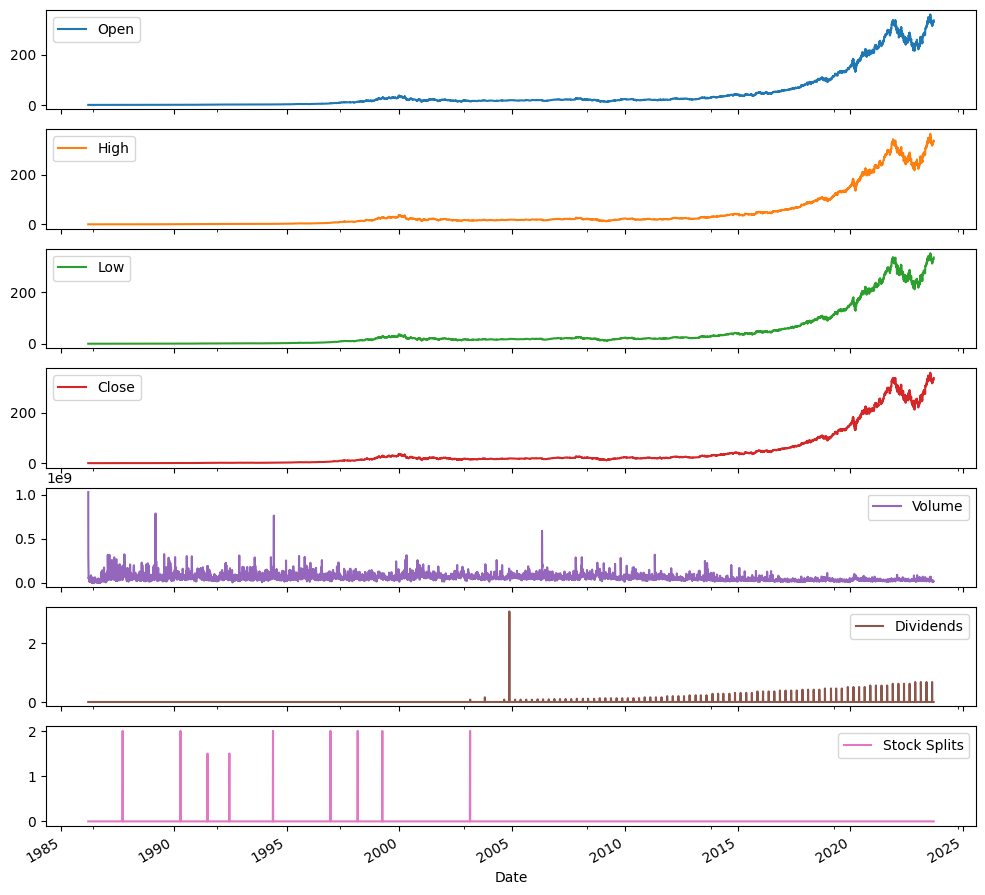

In [91]:
hist.plot(kind="line", figsize=(12, 12), subplots=True)

In [109]:
major_indices = pd.read_html("https://finance.yahoo.com/world-indices")[0]

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1006)>